In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
df = pd.read_csv(r"C:\Users\ASUS\Downloads\train.csv")

In [3]:
df


,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [4]:
train = df.drop(['textID','text'],axis=1)
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


# Data Preprocessing

In [5]:
train.selected_text.fillna('No text',inplace=True)

In [6]:
def cleantext(text):
    text = re.sub(r'@[A-Za-z0-9]+','', text) #remove mentions
    text = re.sub(r'#','', text) #remove hash
    text = re.sub(r'https?:\/\/\S+', '', text) #remove hyperlink
    text = re.sub('\s+', ' ', text) #remove new line char
    text = re.sub("\'", "", text) #remove single quotes
    
    return text

In [7]:
train["selected_text"] = train["selected_text"].apply(cleantext)

In [8]:
train["selected_text"].head(15)

0                   I`d have responded, if I were going
1                                              Sooo SAD
2                                           bullying me
3                                        leave me alone
4                                         Sons of ****,
5      - some shameless plugging for the best Ranger...
6                                                   fun
7                                            Soooo high
8                                           Both of you
9                          Wow... u just became cooler.
10    as much as i love to be hopeful, i reckon the ...
11                                                 like
12                                          DANGERously
13                                                 lost
14                           test test from the LG enV2
Name: selected_text, dtype: object

In [9]:
import string
train["selected_text"] = train["selected_text"].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])

In [10]:
train["selected_text"] = train["selected_text"].apply(lambda wrd: ''.join(wrd))

In [11]:
train["selected_text"]

0                        id have responded if i were going
1                                                 sooo sad
2                                              bullying me
3                                           leave me alone
4                                                 sons of 
                               ...                        
27476                                               d lost
27477                                           dont force
27478                             yay good for both of you
27479                                 but it was worth it 
27480    all this flirting going on  the atg smiles yay...
Name: selected_text, Length: 27481, dtype: object

In [12]:
import nltk


In [13]:
from nltk.corpus import stopwords

In [14]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
train["selected_text"][:50] = train["selected_text"][:50].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words("english")]))

In [16]:
train["selected_text"]

0                                       id responded going
1                                                 sooo sad
2                                                 bullying
3                                              leave alone
4                                                     sons
                               ...                        
27476                                               d lost
27477                                           dont force
27478                             yay good for both of you
27479                                 but it was worth it 
27480    all this flirting going on  the atg smiles yay...
Name: selected_text, Length: 27481, dtype: object

In [17]:
import gensim
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence),     deacc=True))

In [18]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

In [19]:
temp = []
data_to_list = train['selected_text'].values.tolist()
for i in range(len(data_to_list)):
    temp.append(data_to_list[i])
data_wordslem = list(sent_to_words(temp))

Using Lemmatizer instead of stemming. Lemmatizer is preffered over stemming. Lemmatizer find the root word whereas Stemmizer shorten the word. For Example, word 'Caring' -> Lemmatizer -> 'Care' WHEREAS 'Caring' -> Stemming -> 'Car'

In [20]:
import nltk
lemmatizer = nltk.stem.WordNetLemmatizer()

In [21]:
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
for i in range(len(data_wordslem)):
    for j in range(len(data_wordslem[i])):
        data_wordslem[i][j] = lemmatizer.lemmatize(data_wordslem[i][j],pos="v")

In [23]:
data = []
for i in range(len(data_wordslem)):
    data.append(detokenize(data_wordslem[i]))
print(data[:5])

['id respond go', 'sooo sad', 'bully', 'leave alone', 'sons']


# Building a Model

In [24]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers

# Tokenizing and adding padding

In [25]:
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...  290 1026   15]
 [   0    0    0 ...    0  399   64]
 [   0    0    0 ...    0    0 3103]
 ...
 [   0    0    0 ...  379   12    5]
 [   0    0    0 ...    1  533    8]
 [   0    0    0 ...  548  196  398]]


In [26]:
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64)

# Using BiDirectional RNN and LSTM

Bidirectional RNN is preffered over simple RNN because Bidirectional RNN will keep the activations of future words while predicting activations of current words using backprop through time. LSTM (long short term memory) is used to remember the word. Its like a memory of Neual Networks.

In [29]:

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

max_words = 10000  # example value
max_len = 200  # example value

model2 = Sequential()
model2.add(layers.Embedding(max_words, 40, input_length=max_len))
model2.add(layers.Bidirectional(layers.LSTM(20, dropout=0.6)))
model2.add(layers.Dense(3, activation='softmax'))

# Compile the model
model2.compile(optimizer='rmsprop', 
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

model2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 40)           400000    
                                                                 
 bidirectional (Bidirection  (None, 40)                9760      
 al)                                                             
                                                                 
 dense (Dense)               (None, 3)                 123       
                                                                 
Total params: 409883 (1.56 MB)
Trainable params: 409883 (1.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model2.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

# Label Encoding of output

In [37]:
import tensorflow as tf
labels = np.array(train['sentiment'])
y = []
for i in range(len(labels)):
    if labels[i] == 'neutral':
        y.append(0)
    if labels[i] == 'negative':
        y.append(1)
    if labels[i] == 'positive':
        y.append(2)
y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 3, dtype="float32")
del y

# Training the Model

In [40]:
# import numpy as np
# import tensorflow as tf

# # Check if CUDA is available
# if tf.test.is_gpu_available():
#     print("Using GPU")
# else:
#     print("Using CPU")

# # Convert labels to one-hot encoded format
# labels = np.array(train['sentiment'])
# y = []
# for i in range(len(labels)):
#     if labels[i] == 'neutral':
#         y.append(0)
#     if labels[i] == 'negative':
#         y.append(1)
#     if labels[i] == 'positive':
#         y.append(2)
# y = np.array(y)
# labels = tf.keras.utils.to_categorical(y, 3, dtype="float32")
# del y

# # Convert tweets and labels to TensorFlow Dataset
# dataset = tf.data.Dataset.from_tensor_slices((tweets, labels))
# dataset = dataset.shuffle(buffer_size=1024).batch(32).prefetch(tf.data.AUTOTUNE)

# # Define the model
# max_words = 10000  # example value
# max_len = 200  # example value
# embedding_dim = 40
# lstm_units = 20

# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(max_words, embedding_dim, input_length=max_len),
#     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_units, dropout=0.6)),
#     tf.keras.layers.Dense(3, activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model with parallel processing on CUDA
# history = model.fit(dataset, epochs=20, validation_split=0.2)

# # Print the training history
# print(history.history)


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Using CPU


ValueError: `validation_split` is only supported for Tensors or NumPy arrays, found following types in the input: [<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>]

In [41]:
history = model2.fit(x=tweets, y=labels, epochs=20, validation_split=0.2)

Epoch 1/20
687/687 [==============================] - 26s 38ms/step - loss: 0.2984 - accuracy: 0.8895 - val_loss: 0.4495 - val_accuracy: 0.8394
Epoch 2/20
687/687 [==============================] - 36s 52ms/step - loss: 0.2884 - accuracy: 0.8926 - val_loss: 0.4546 - val_accuracy: 0.8377
Epoch 3/20
687/687 [==============================] - 38s 56ms/step - loss: 0.2795 - accuracy: 0.8972 - val_loss: 0.4593 - val_accuracy: 0.8370
Epoch 4/20
687/687 [==============================] - 38s 56ms/step - loss: 0.2690 - accuracy: 0.9003 - val_loss: 0.4692 - val_accuracy: 0.8345
Epoch 5/20
687/687 [==============================] - 39s 56ms/step - loss: 0.2633 - accuracy: 0.9011 - val_loss: 0.4801 - val_accuracy: 0.8355
Epoch 6/20
687/687 [==============================] - 38s 56ms/step - loss: 0.2545 - accuracy: 0.9042 - val_loss: 0.4810 - val_accuracy: 0.8295
Epoch 7/20
687/687 [==============================] - 38s 56ms/step - loss: 0.2508 - accuracy: 0.9073 - val_loss: 0.4866 - val_accuracy:

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim

# max_words = 10000  # example value
# max_len = 200  # example value
# embedding_dim = 40
# lstm_units = 20

# class BiLSTMModel(nn.Module):
#     def __init__(self, vocab_size, embedding_dim, lstm_units, output_dim):
#         super(BiLSTMModel, self).__init__()
#         self.embedding = nn.Embedding(vocab_size, embedding_dim)
#         self.bilstm = nn.LSTM(embedding_dim, lstm_units, bidirectional=True)
#         self.dropout = nn.Dropout(0.6)
#         self.fc = nn.Linear(lstm_units * 2, output_dim)
    
#     def forward(self, x):
#         x = self.embedding(x)
#         x, _ = self.bilstm(x)
#         x = self.dropout(x)
#         x = torch.mean(x, dim=1)  # Average pooling over the sequence length
#         x = self.fc(x)
#         return x

# # Initialize model, move it to CUDA if available
# model = BiLSTMModel(max_words, embedding_dim, lstm_units, 3)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = model.to(device)

# # Define loss and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.RMSprop(model.parameters())

# print(model)


In [42]:
import matplotlib.pyplot as plt

# Visualizing Loss

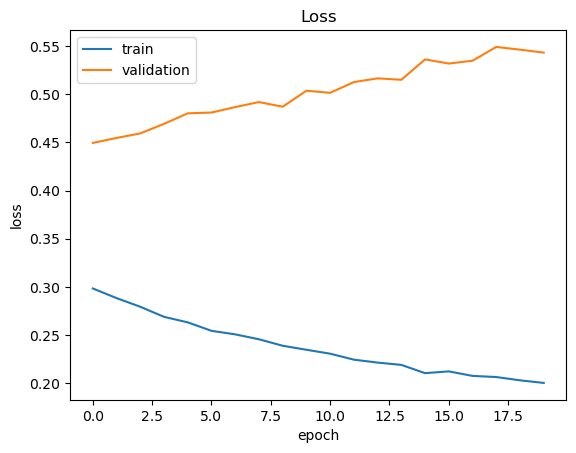

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

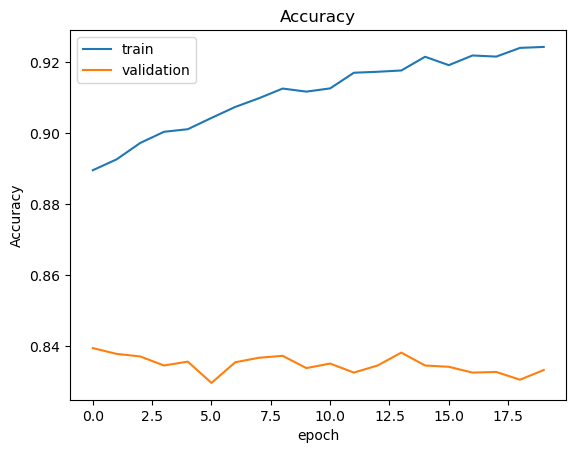

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Prediction and Result

In [45]:
sentiment = ['Neutral','Negative','Positive']

In [46]:
sequence = tokenizer.texts_to_sequences(['this experience has been the worst, very bad product'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 1s 1s/step


'Negative'

In [47]:
sequence = tokenizer.texts_to_sequences(['very useefull'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 48ms/step


'Positive'

In [48]:
sequence = tokenizer.texts_to_sequences(['i love sayabidevs'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 24ms/step


'Positive'

In [49]:
sequence = tokenizer.texts_to_sequences(['I go to gym daily'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 24ms/step


'Neutral'

In [54]:
dialog = input(str("enter the test sentence!"))

enter the test sentence!lets play a game 


In [55]:
sequence = tokenizer.texts_to_sequences([dialog])
test = pad_sequences(sequence, maxlen=max_len)
print("sentance", "::::", dialog, "::::", "is")
sentiment[np.around(model2.predict(test), decimals=0).argmax(axis=1)[0]]

sentance :::: lets play a game  :::: is
1/1 [==============================] - 0s 24ms/step


'Neutral'